In [35]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import dew_gwdata as gd
import pandas as pd

In [2]:
%matplotlib inline
plt.rcParams["figure.dpi"] = 120

In [3]:
db = gd.sageodata()

In [76]:
sal = db.salinities(db.find_wells("lkw039"))

In [79]:
EXTRACT_METHOD_LUT = {
    "AIRL": "Air Lift",
    "BAIL": "Bailer",
    "BUCK": "Bucket",
    "EST": "Estimated",
    "FLOW": "Flow",
    "HAND": "Hand",
    "PUMP": "Pump",
    "UKN": "Unknown",
    "WMLL": "Windmill",
    "?": "?",
}

measured_during_lut = {
    "A": "Aquifer Test",
    "D": "Drilling",
    "F": "Field Survey",
    "S": "Final Sample on drilling completion",
    "G": "Geophysical Logging",
    "L": "Landowner Sample",
    "M": "Monitoring",
    "R": "Rehabilitation",
    "U": "Unknown",
    "W": "Well Yield",
    "?": "?",
}

extract_method_markers = {
    "AIRL": "$a$",
    "BAIL": "v",
    "BUCK": ">",
    "EST": "$?$",
    "FLOW": "P",
    "HAND": "<",
    "PUMP": "o",
    "UKN": ".",
    "WMLL": "o",
    "?": ".",
}

meas_during_colours = {
    "M": "tab:cyan",  # 'Monitoring',
    "F": "tab:blue",  # 'Field Survey',
    "A": "tab:green",  # 'Aquifer Test',
    "W": "tab:olive",  # 'Well Yield',
    "L": "tab:pink",  # 'Landowner Sample',
    "G": "tab:purple",  # 'Geophysical Logging',
    "D": "tab:red",  # 'Drilling',
    "S": "tab:orange",  # 'Final Sample on drilling completion',
    "R": "tab:brown",  # 'Rehabilitation',
    "U": "tab:gray",  # 'Unknown',
    "?": "black",  # '?'
}


def plot_salinity(
    df, dt_col="collected_date", sal_col="tds", ax=None, fontsize="medium"
):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    dfx = pd.DataFrame(df)
    mdurings = []
    emeths = []
    if "measured_during" in dfx and "extract_method" in dfx:
        dfx.loc[pd.isnull(dfx.extract_method), "extract_method"] = "?"
        dfx.loc[pd.isnull(dfx.measured_during), "measured_during"] = "?"
        for mduring, df1 in dfx.groupby("measured_during"):
            mfc = meas_during_colours[mduring]
            mdurings.append(mduring)
            for emeth, df2 in df1.groupby("extract_method"):
                marker = extract_method_markers[emeth]
                ax.plot(
                    df2[dt_col],
                    df2[sal_col],
                    ls="",
                    marker=marker,
                    mfc=mfc,
                    mec="grey",
                    mew=0.5,
                )
                emeths.append(emeth)
    if "anomalous_ind" in df:
        valid = df.anomalous_ind == "N"
        ax.plot(
            dfx[valid][dt_col],
            dfx[valid][sal_col],
            lw=0.5,
            marker="None",
            color="tab:blue",
        )
        ax.plot(
            dfx[~valid][dt_col], dfx[~valid][sal_col], ls="", marker="X", color="black"
        )
    else:
        ax.plot(dfx[dt_col], dfx[sal_col], lw=0.5, marker="None", color="tab:blue")
    for mduring in set(mdurings):
        ax.plot(
            [],
            [],
            ls="",
            mew=0.5,
            mec="grey",
            marker="8",
            mfc=meas_during_colours[mduring],
            label=f"M.D. {measured_during_lut[mduring]}",
        )
    for emeth in set(emeths):
        ax.plot(
            [],
            [],
            ls="",
            mew=0.5,
            mec="grey",
            marker=extract_method_markers[emeth],
            mfc="white",
            label=f"E.M. {EXTRACT_METHOD_LUT[emeth]}",
        )
    ax.set_ylabel(sal_col, fontsize=fontsize)
    ax.set_xlabel(dt_col, fontsize=fontsize)
    plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    plt.setp(ax.get_yticklabels(), fontsize=fontsize)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.legend(loc="best", frameon=False, fontsize=5)

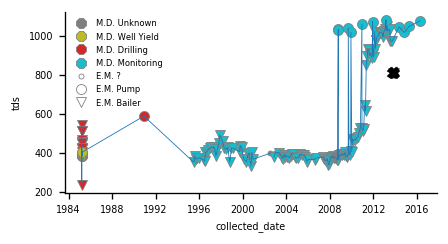

In [88]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(111)
plot_salinity(sal, sal_col="tds", ax=ax, fontsize="xx-small")